Gunakan data spam.csv untuk analisis! Kelas 1 merupakan email yang dianggap spam, kelas 0 merupakan email bukan spam.

In [1]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Mendefinisikan data path
path_data = '/content/gdrive/MyDrive/SIB/3. Data Preparation using Python/3.3 Handling Imbalanced Data/'

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
data = pd.read_csv(path_data+'spam.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_titikcoma,char_freq_kurungbuka,char_freq_sikubuka,char_freq_tandaseru,char_freq_dolar,char_freq_pagar,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<Axes: >

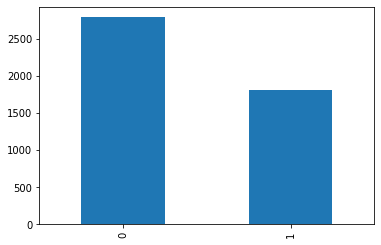

In [5]:
data['Class'].value_counts().plot.bar() #melihat imbalance data

Bagaimana proporsi data tiap kelas?

In [6]:
print('Proportion of the classes in the data:')
print(data['Class'].value_counts() / len(data))

Proportion of the classes in the data:
0    0.605955
1    0.394045
Name: Class, dtype: float64


terlihat untuk kelas 0 bernilai mendekati 60% dan kelas 1 hanya bernilai mendekati 40%, sehingga dapat disumpulkan bahwa data tersebut tidak balance

Apakah ditemukam missing value?

In [7]:
data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

tidak ada missing value pada data

Bagaimana analisis regresi logistik dengan unbalance data?

*Penggunaan Imbalance data sering digunakan di kasus klasifikasi. ALgoritma sederhana pakai contoh Regresi logistik (untuk detail modelling akan di bahas di Pertemuan klasifikasi)

Klasifikasi

In [9]:
X = np.array(data.loc[:, data.columns != 'Class']) #x=semua data kecuali data kolom data class
y = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1) #y=menggunakan class

In [10]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #untuk transformasi dari data x ke data yang terfarmasi
X = scaler.fit_transform(X)

In [11]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [12]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

whitout smote

In [13]:
# fit the model
clf.fit(X_train, y_train.ravel()) 

# prediction for training dataset
train_pred = clf.predict(X_train) #untk memprediksi

# prediction for testing dataset
test_pred = clf.predict(X_test) #mendapatkan predisksi dari data testing

In [14]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9282933160285529
Accuracy score for Testing Dataset =  0.9262672811059908


didapatkan akurasi data sebesar 93% yaitu diatas 90% yang mana mendekati 100%. Artinya akurasi sangat tinggi

Interpretasi hasil

In [15]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          1778    90  1868
1           131  1083  1214
All        1909  1173  3082


131 dari 1214 instance yang termasuk dalam kelas 1 telah diklasifikasikan sebagai kelas 0.


In [16]:
131/1214

0.10790774299835255

hasil klasifikasi 10,8% kasus spam sebagai bukan kasus spam. 

In [17]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0    1   All
True                     
0          872   48   920
1           64  535   599
All        936  583  1519


In [18]:
64/599

0.10684474123539232

64 dari 599 kasus yang termasuk dalam kelas 1 telah diklasifikasikan sebagai 0. sekitar 10,7% kasus spam hilang


Using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [20]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
#untuk menyeimbangkan data 

<Axes: >

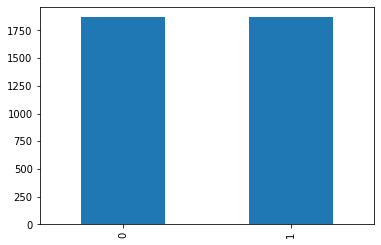

In [21]:
# Data telah seimbang
pd.Series(y_train_new).value_counts().plot.bar()

In [22]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [23]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9301391862955032
Accuracy score for Testing Dataset =  0.9295589203423305


In [24]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          1753   115  1868
1           146  1722  1868
All        1899  1837  3736


In [25]:
146/1868

0.07815845824411134

146 dari 1868 kasus spam telah diklasifikkasikan sebaga bukan spam. ini hanya 7,8% dibandingkan dengan 10,7% sebelumnya.terdapat peningkatan

In [26]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0    1   All
True                     
0          860   60   920
1           47  552   599
All        907  612  1519


In [27]:
47/599

0.07846410684474124

7,8% dari kelas spam telah diklasifikasikan sebagai bukan spam

Bagaimana hasilnya setelah unbalance data diatasi?

Terjadi peningkatan akurasi dan tidak terjadi penurunan.


Kesalahan dalam prediksi dapat dilakukan dengan dua cara:

Mengklasifikasikan bukan spam sebagai spam 

1.   Mengklasifikasikan bukan spam sebagai spam
2.   Mengklasifikasikan spam sebagai bukan spam



Tujuan dari setiap klasifikasi berbeda. Jadi untuk mengevaluasi setiap model sehubungan dengan tujuannya sendiri, bukan hanya menilai keakuratannya